In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-dataset/gld_price_data.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('/kaggle/input/gold-price-dataset/gld_price_data.csv')

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.shape

(2290, 6)

In [7]:
# Checking the no. of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Getting the statistical measures of the data 
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Data Analysis**

In [10]:
correlation=df.corr(numeric_only=True)

<Axes: >

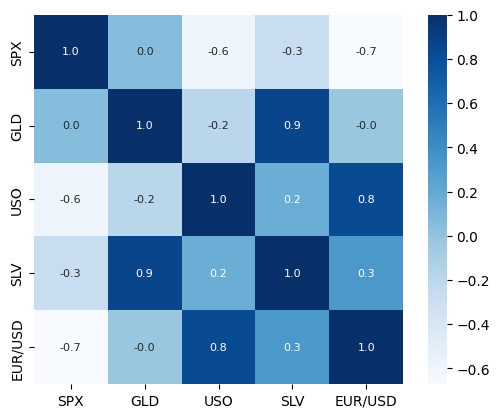

In [11]:
# Constructing a Heatmap to understand the correlation
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')


In [12]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_55/669081407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

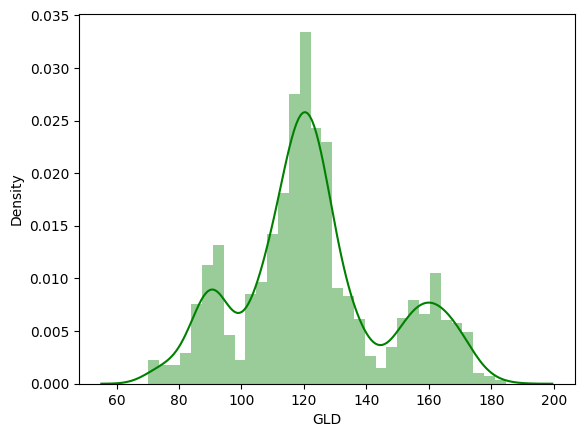

In [13]:
# Checking th distplot of gld
sns.distplot(df['GLD'],color='green')

# **Splitting the features and targets**

In [27]:
x=df.drop(['GLD','Date'],axis=1)
y=df['GLD']

In [28]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [29]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [30]:
# Train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


# **Model Training**

In [32]:
# Random Forest Regressor
model=RandomForestRegressor(n_estimators=100)

In [33]:
model.fit(x_train,y_train)

RandomForestRegressor()

# **Model Evaluation**

In [35]:
y_pred=model.predict(x_test)
print(y_pred)

[122.35139983 130.77100269 127.6181998   96.49749746 118.5965004
 114.45789914 124.87490103 117.88359953 108.1038016   98.28279975
  95.34279931 167.54299808 149.65950072 116.38390072 170.93860145
  85.06489975 123.21699883 108.46849689 113.22980063 131.59680336
 124.33779878 113.51520096 116.08710015 108.7126995  108.68720165
 125.6856998  118.94319951 112.23119945 113.53300128 125.13499881
 146.08450164  89.54570031 167.70810001 113.82699959 108.37500132
 120.15070099 141.61949918 161.51680151 173.78229772 152.9815015
 119.04810144 113.55800029 121.37179938 113.71029962 122.01160021
 107.99580074  88.43459905 114.56719908 129.5396026  117.88460092
 104.2002003  129.62330261 107.33779856 160.38460332 132.18100074
 118.04869987 146.92870093 134.74150197  95.43600122 124.65300168
 115.06369852  86.25560113 104.22849891 113.76790032  84.17709923
 122.31260029 116.391399   113.64020207 164.78390328  92.25050025
  80.63000092 161.04070057 158.96530241 106.34800027 148.69060104
 109.5951975

In [36]:
print('R2_score : ',r2_score(y_test,y_pred))

R2_score :  0.9912890949592086


# **Compare the Actual Values and Predicted Values in a Plot**

In [37]:
y_test=list(y_test)

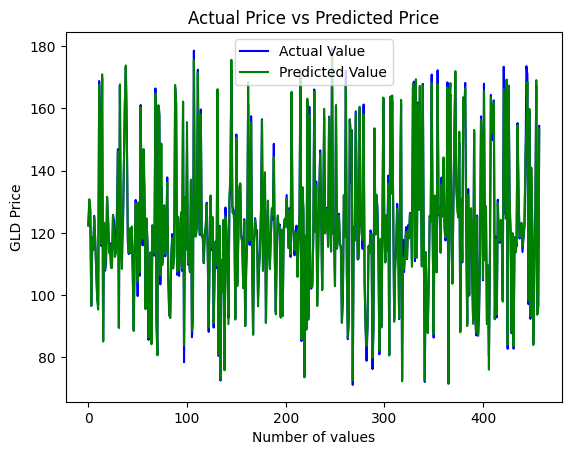

In [38]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(y_pred,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# **Predictive System**

In [39]:
input_data=(1447.160034,78.470001,15.180,1.471692)

input_data_numpy=np.asarray(input_data)

input_data_reshape=input_data_numpy.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

[84.88520012]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
